In [17]:
import sys
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import zipfile
import io
import re
import IPython.display as ipd
from tensorflow.keras.utils import normalize

In [52]:
data = []
labels = []
root = "audio_data/training_data"

In [61]:
for cd, subdirs, files in os.walk(root, topdown=False):
    hl, kl, tl = re.split("[\\\\/]", cd)[-3:]
    if (kl == "ride" and tl=="bell"):
        for name in files[0:10]:
            data.append(np.loadtxt(os.path.join(cd, name)))
            labels.append({"hit-label": hl, "kit-labels": kl, "tech-labels": tl})
        break
labels

[{'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'beater', 'kit-labels': 'bass_drum', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'low_tom', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'low_tom', 'tech-labels': 'normal'},
 {'hit-label': 'stick', 'kit-labels': 'low_tom', 'tech-labels': 'norma

In [4]:
[2**i for i in range(20)]

[1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288]

A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A

c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
c:\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


 (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)
A: (129, 53) 	B: (129, 53)


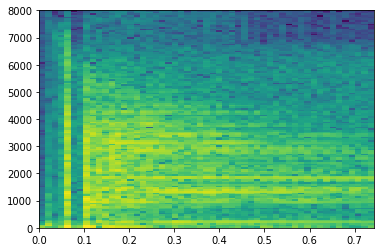

In [64]:
nfft = 256
window_f = signal.windows.hann(nfft)
overlap = 32
fs = 16000
spectrograms_a, spectrograms_b = [], []
for d in data:
    f1, t1, Sxx1 = signal.spectrogram(d, fs=fs, window=window_f, nfft=nfft, noverlap=overlap)
    Sxx1 = 10*np.log10(Sxx1)
    Sxx1[Sxx1 == -np.inf] = 0
    min1 = np.amin(Sxx1)
    Sxx1[Sxx1 == 0] = min1
    spectrograms_a.append((f1, t1, Sxx1))
    Sxx2, f2, t2, im = plt.specgram(x=d, Fs=fs, window=window_f, NFFT=nfft , noverlap=overlap)
    Sxx2 = 10*np.log10(Sxx2)
    Sxx2[Sxx2 == -np.inf] = 0
    min2 = np.amin(Sxx2)
    Sxx2[Sxx2 == 0] = min2
    spectrograms_b.append((f2, t2, Sxx2))
    print("A:", Sxx1.shape, "\tB:", Sxx2.shape)

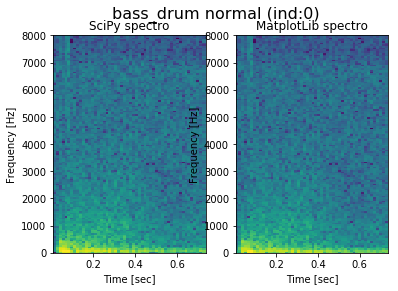

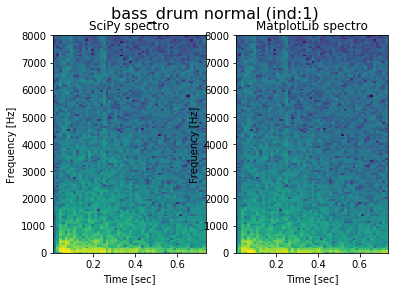

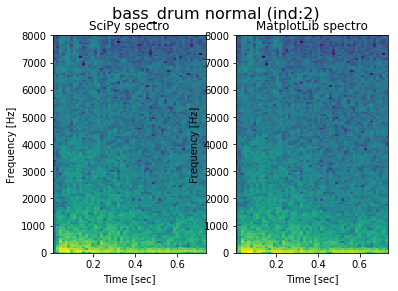

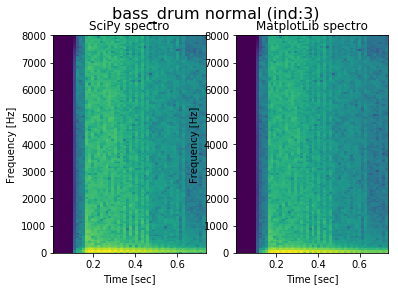

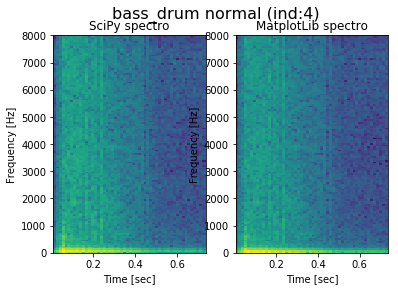

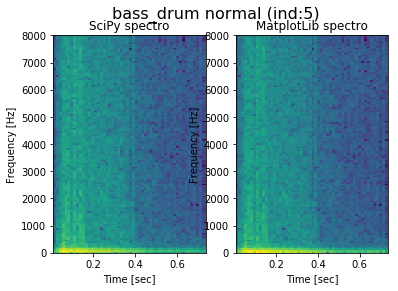

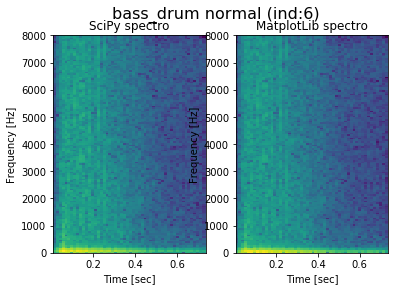

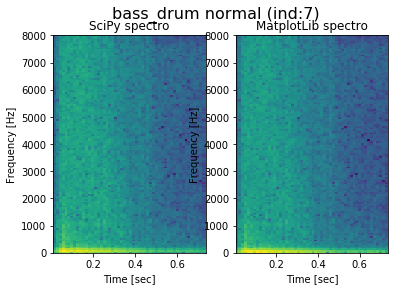

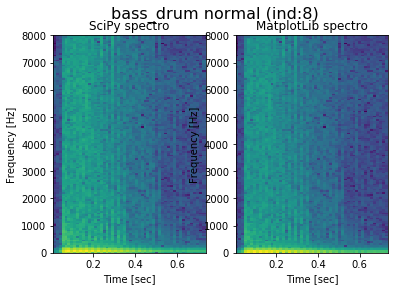

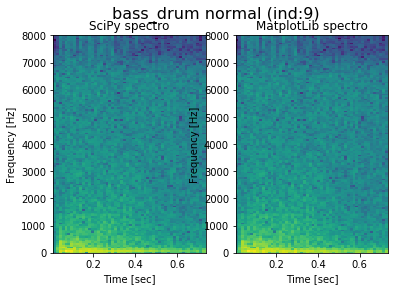

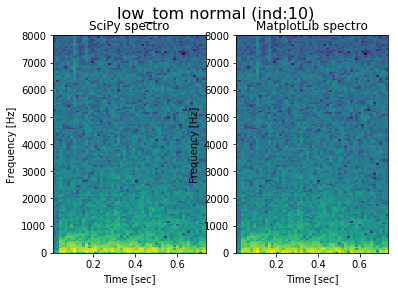

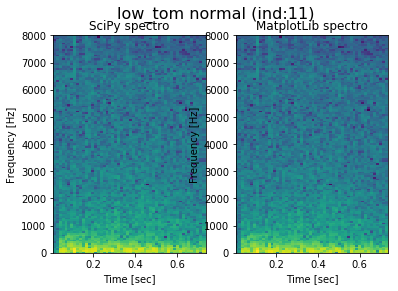

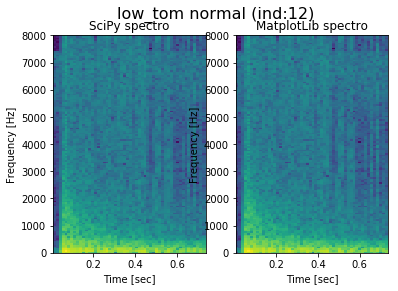

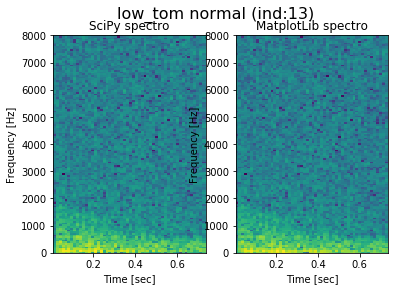

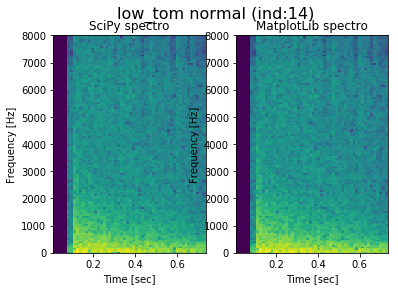

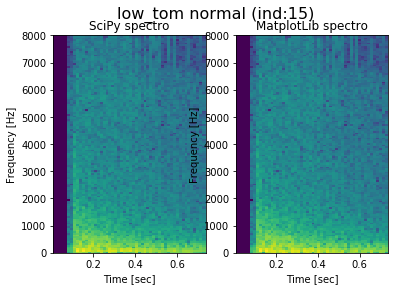

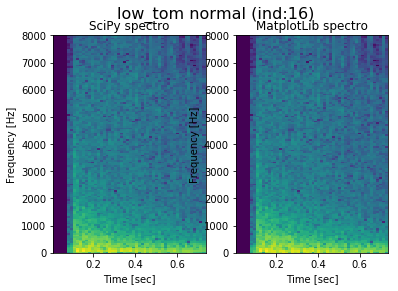

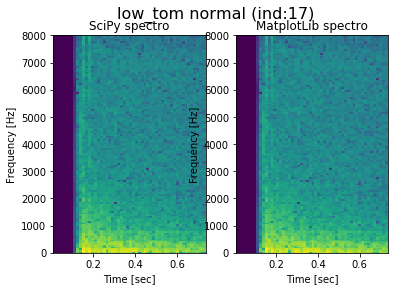

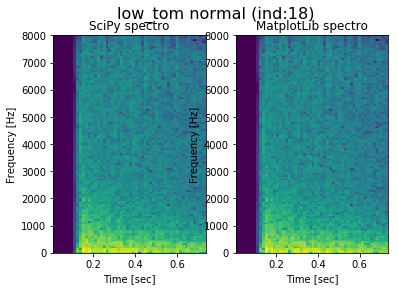

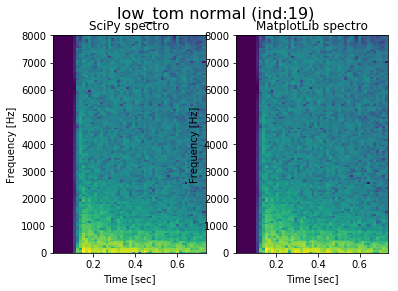

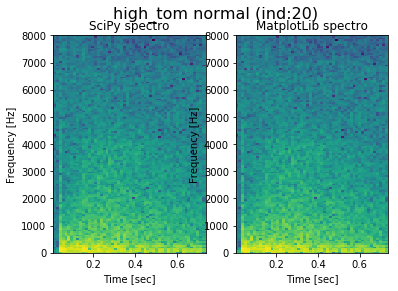

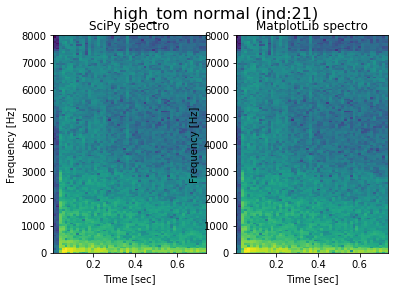

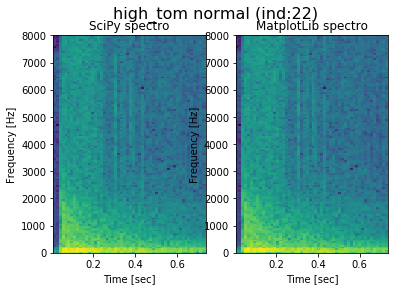

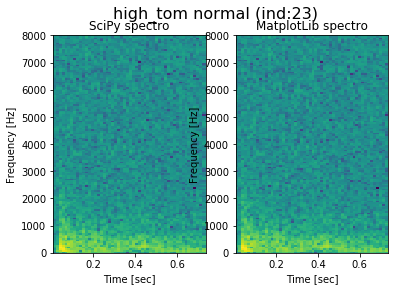

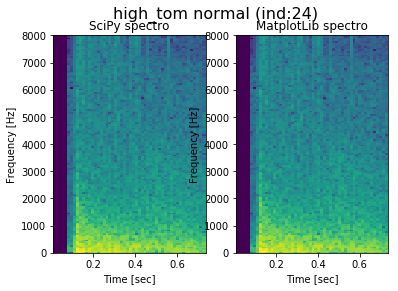

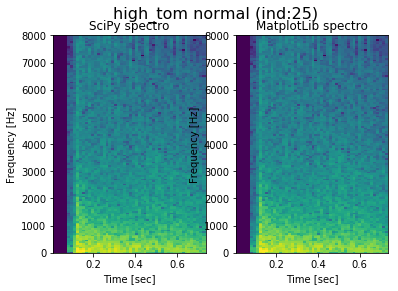

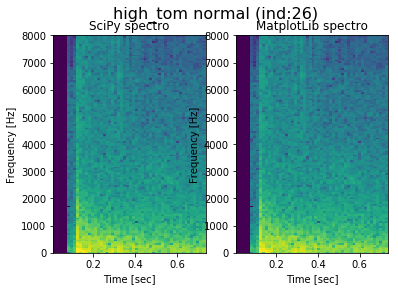

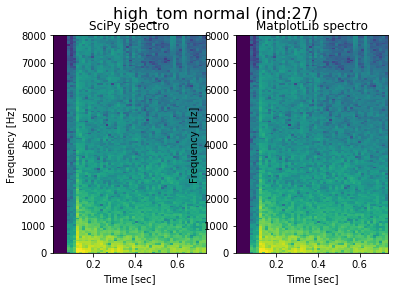

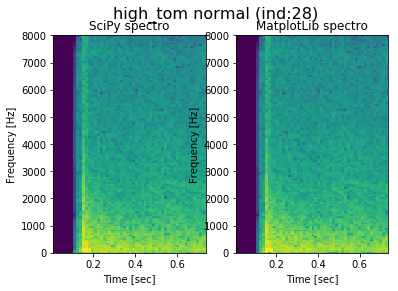

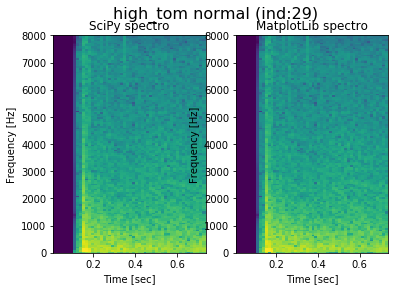

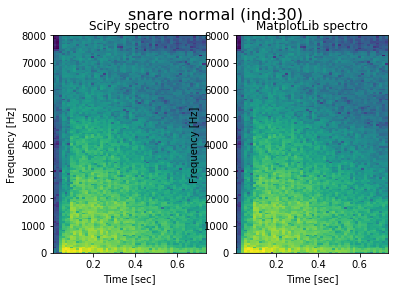

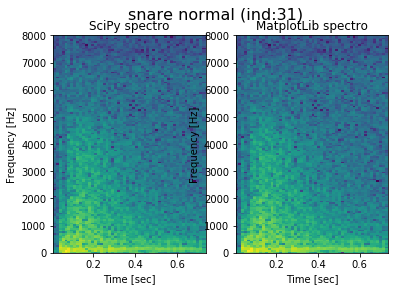

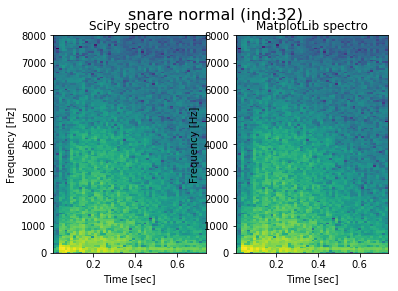

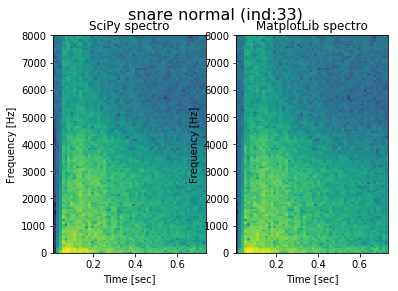

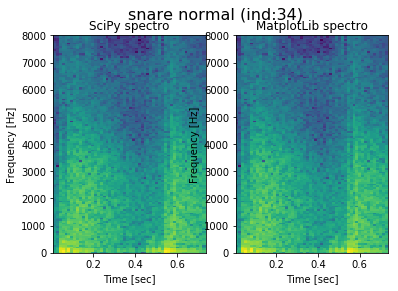

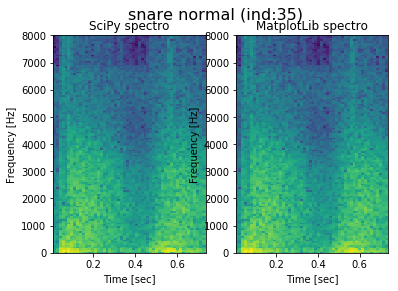

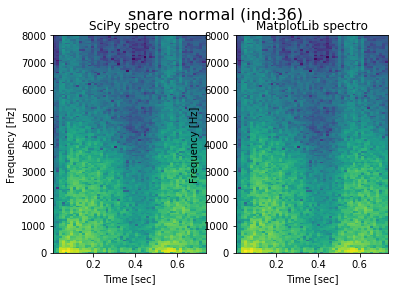

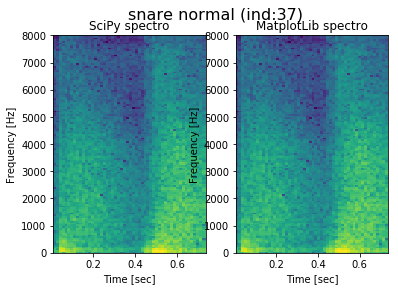

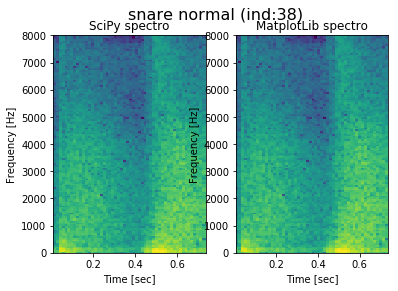

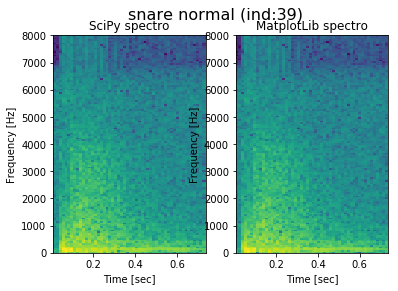

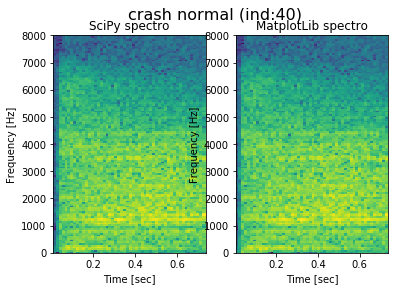

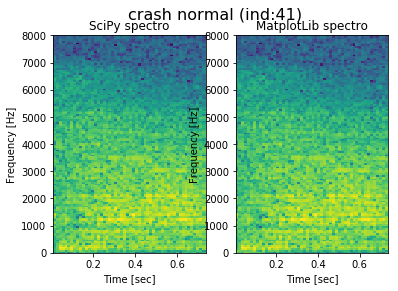

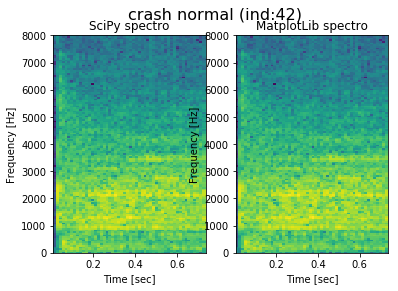

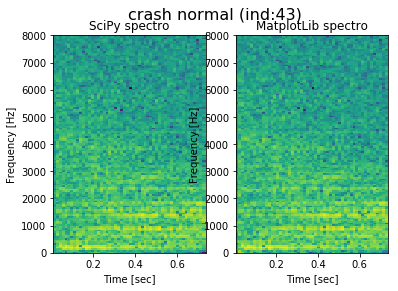

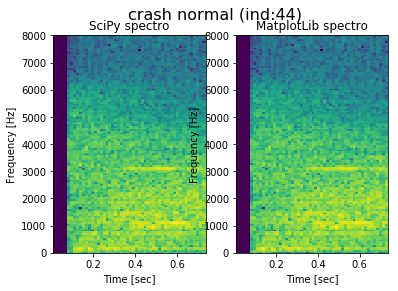

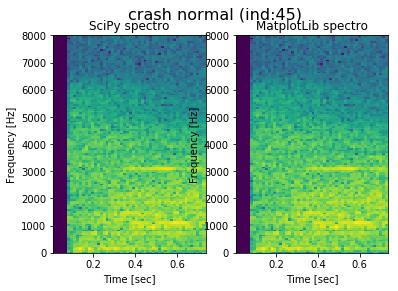

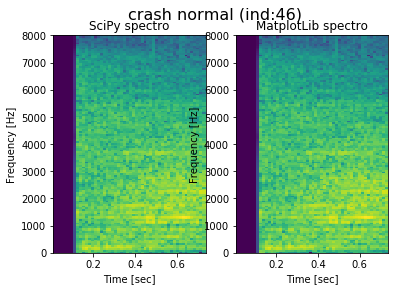

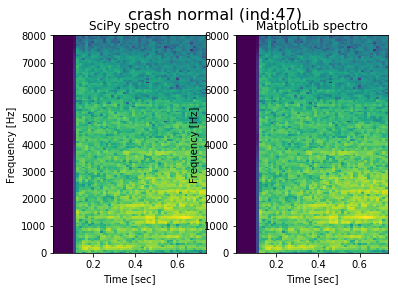

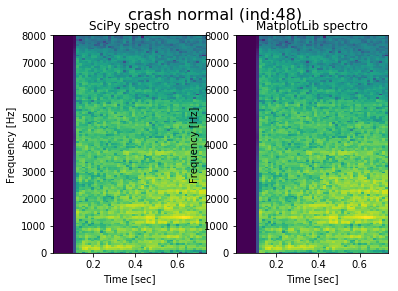

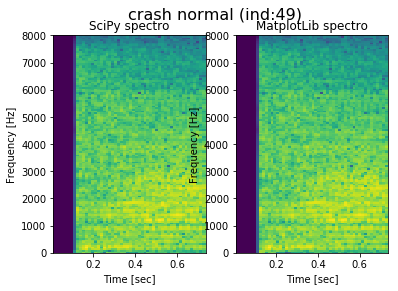

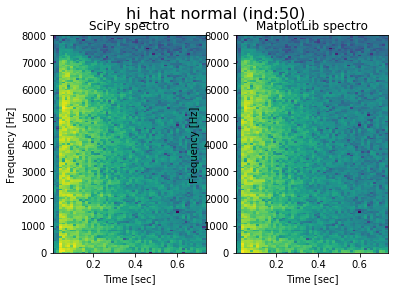

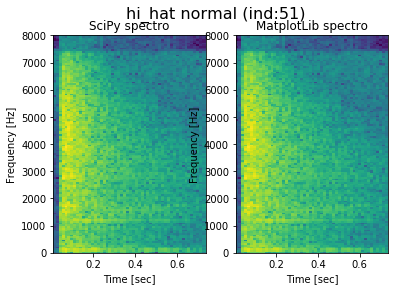

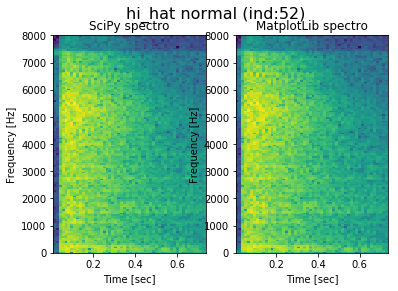

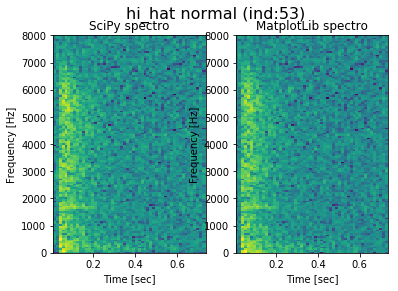

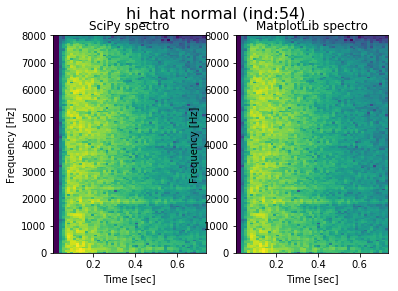

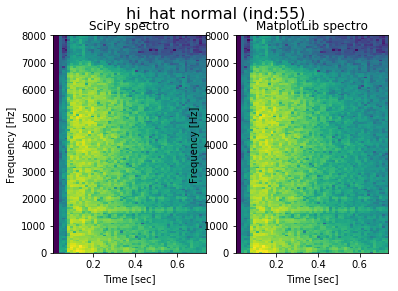

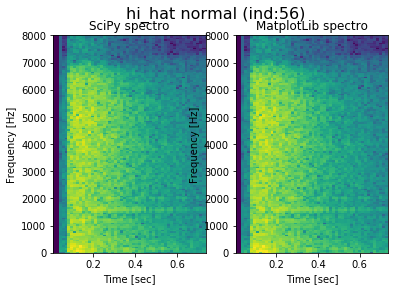

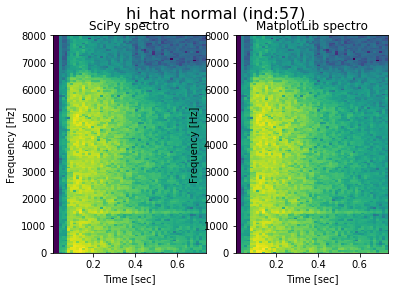

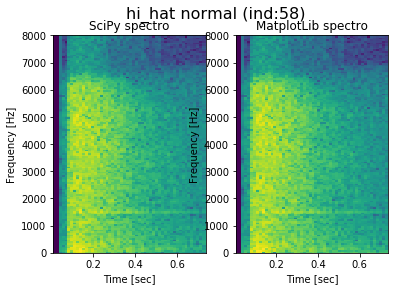

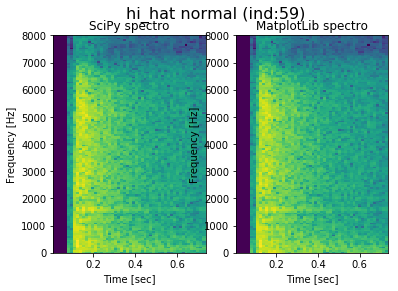

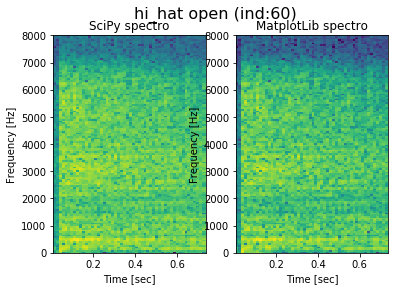

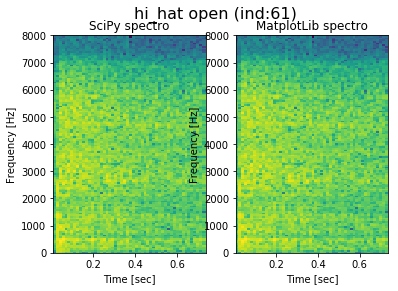

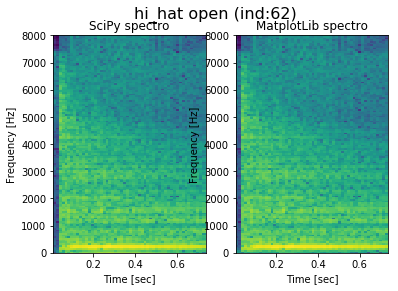

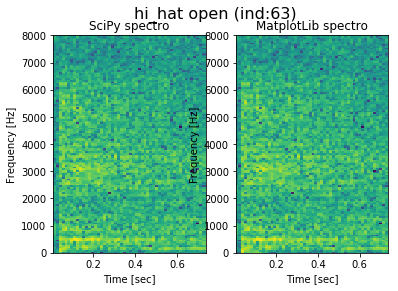

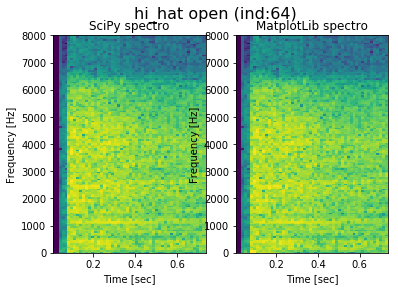

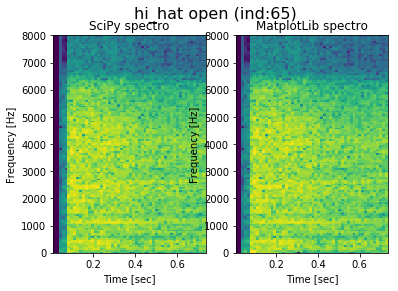

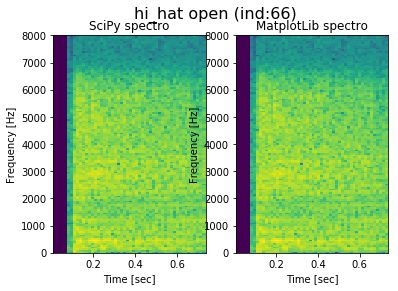

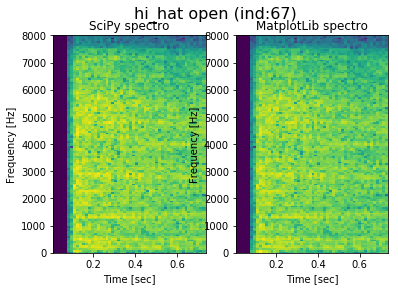

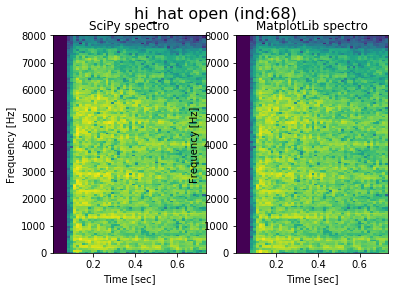

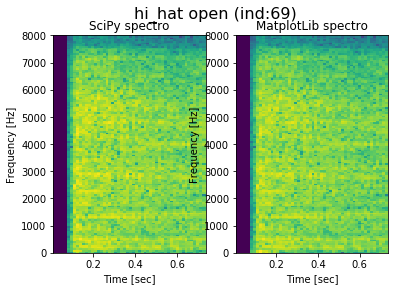

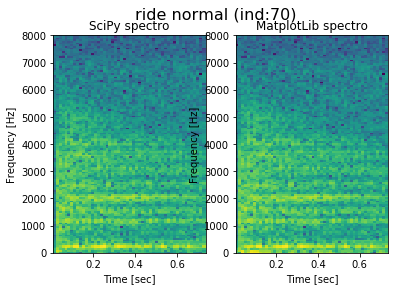

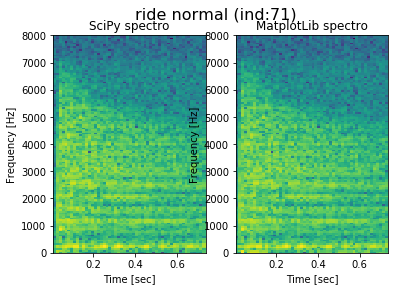

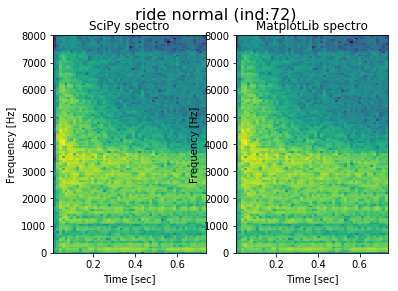

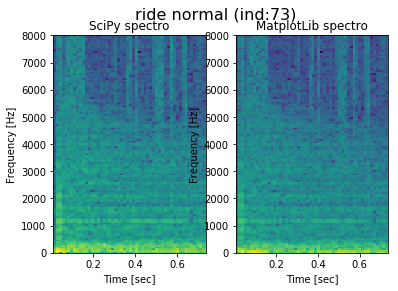

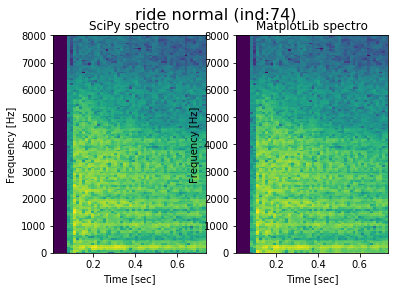

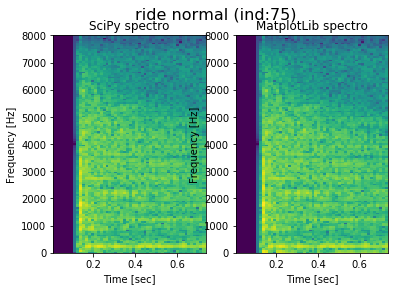

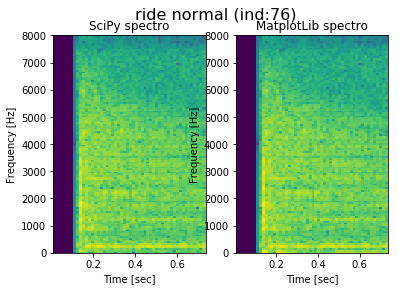

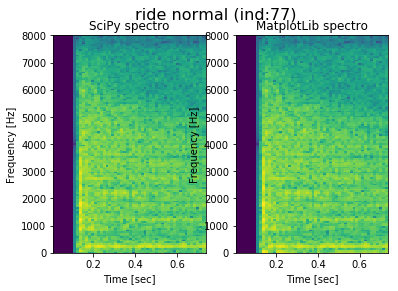

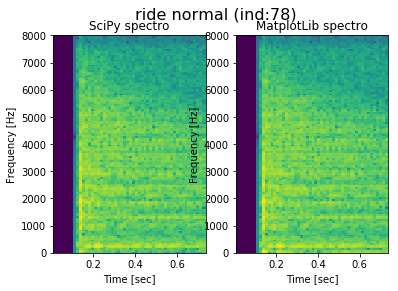

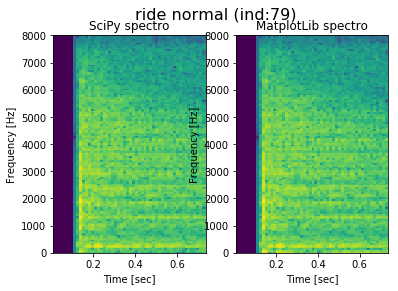

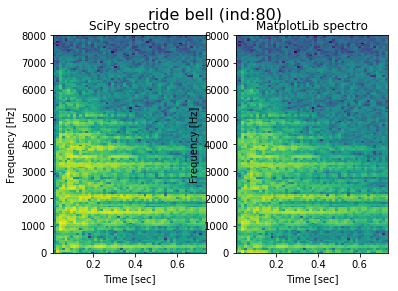

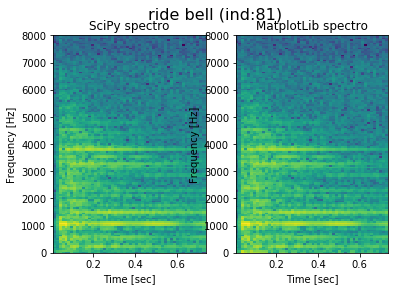

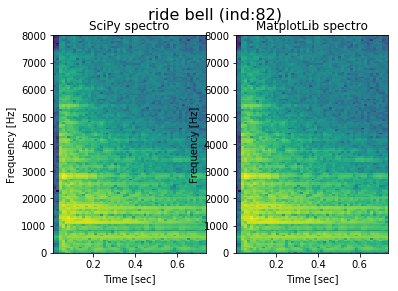

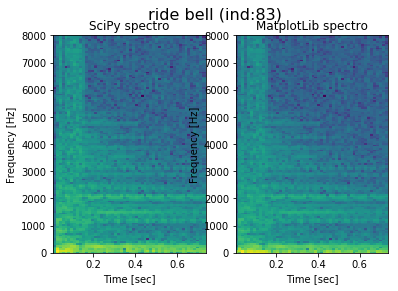

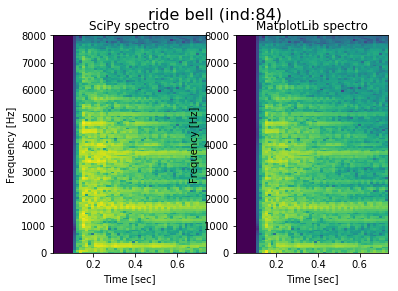

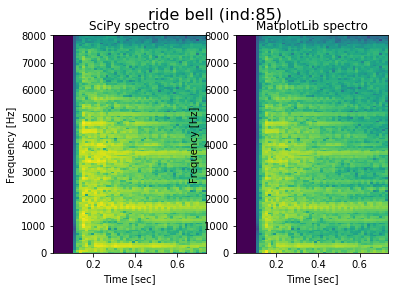

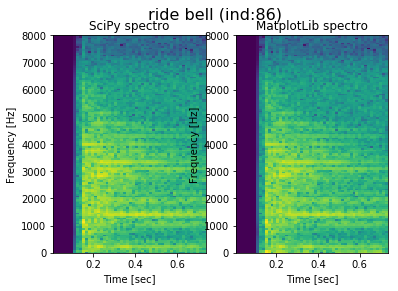

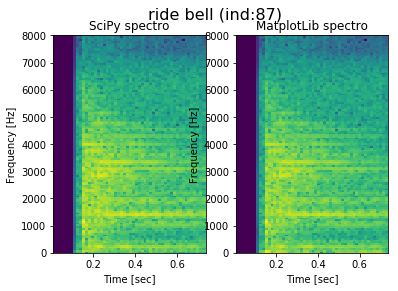

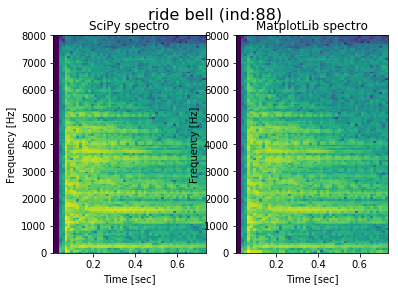

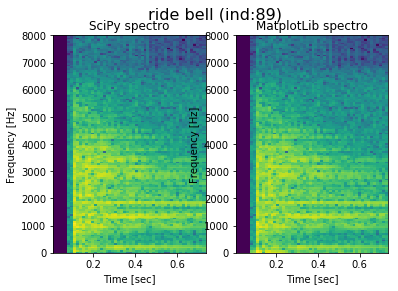

In [65]:
for i in range(len(spectrograms_a)):
    f1, t1, Sxx1 = spectrograms_a[i]
    f2, t2, Sxx2 = spectrograms_b[i]
    # Make Sxx logarithmic (db is a logarithmic scale) but make sure (muted sections of audio) 0 values are normalised so that -inf terms are avoided.
    label = labels[i]
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    ax1.pcolormesh(t1, f1, Sxx1)
    ax1.set_ylabel('Frequency [Hz]')
    ax1.set_ylim((0, 8000))
    ax1.set_xlabel('Time [sec]')
    ax1.set_title("SciPy spectro")
    ax2.pcolormesh(t2, f2, Sxx2)
    ax2.set_ylabel('Frequency [Hz]')
    ax2.set_ylim((0, 8000))
    ax2.set_xlabel('Time [sec]')
    ax2.set_title("MatplotLib spectro")
    fig.suptitle('{} {} (ind:{})'.format(label["kit-labels"], label["tech-labels"], i), fontsize=16)
    plt.show()

In [67]:
ipd.Audio(data=data[4], rate=48000)